In [47]:
""" 1.	Data Cleaning and Preparation:

●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●	Detect and treat outliers if necessary.
"""
import pandas as pd
import numpy as np


In [48]:
df = pd.read_csv("/content/Cardiotocographic.csv")

In [49]:
#Show first few rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [16]:
#Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [17]:
# Fill missing values with median
df = df.fillna(df.median())
#Check again missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [50]:
#  Check data types
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [19]:
#:Detect outliers for all columns using IQR

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

outlier_summary = {}

for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    outlier_summary[col] = len(outliers)

print("Number of outliers detected in each column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Number of outliers detected in each column:
LB: 10
AC: 43
FM: 347
UC: 13
DL: 125
DS: 120
DP: 284
ASTV: 10
MSTV: 80
ALTV: 318
MLTV: 81
Width: 10
Tendency: 10
NSP: 559


In [20]:
#  Treat outliers for all columns by clipping (winsorization)

for col in df.columns:
    lower = df[col].quantile(0.01)  # 1st percentile
    upper = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower, upper)

print("✅ Outliers treated by clipping to 1st–99th percentile for all columns.")

✅ Outliers treated by clipping to 1st–99th percentile for all columns.


In [21]:
#  Verify after treatment
outlier_summary_after = {}

for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    outlier_summary_after[col] = len(outliers)

print("Outliers remaining after treatment:")
for col, count in outlier_summary_after.items():
    print(f"{col}: {count}")

Outliers remaining after treatment:
LB: 0
AC: 39
FM: 340
UC: 0
DL: 119
DS: 120
DP: 284
ASTV: 0
MSTV: 77
ALTV: 315
MLTV: 76
Width: 0
Tendency: 0
NSP: 559


In [ ]:
"""
 Observations:

For some columns like LB, UC, ASTV, Width, Tendency, winsorization removed all outliers.

For others (e.g., FM, DP, NSP) many outliers remain → they may have naturally skewed distributions (common in medical signal data).
"""

In [ ]:
#2.	Statistical Summary:
"""
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
●	Highlight any interesting findings from this summary.
"""

In [23]:
# Basic summary
summary = df.describe().T

# Add Median and IQR
summary["median"] = df.median()
summary["IQR"] = df.quantile(0.75) - df.quantile(0.25)

summary

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,1.332990e+02,9.835122e+00,110.000000,126.000000,133.000000,140.000000,158.000000,133.000000,14.000000
AC,2126.0,3.163850e-03,3.844034e-03,-0.000049,0.000000,0.001634,0.005606,0.015153,0.001634,0.005606
FM,2126.0,9.546897e-03,4.422954e-02,-0.001202,0.000000,0.000000,0.002567,0.358548,0.000000,0.002567
UC,2126.0,4.361029e-03,2.949033e-03,0.000000,0.001851,0.004484,0.006536,0.011575,0.004484,0.004685
DL,2126.0,1.895035e-03,2.961056e-03,-0.000036,0.000000,0.000000,0.003289,0.012539,0.000000,0.003289
DS,2126.0,3.342928e-08,5.629417e-07,-0.000003,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000
DP,2126.0,1.571196e-04,5.627226e-04,-0.000018,0.000000,0.000000,0.000000,0.003182,0.000000,0.000000
ASTV,2126.0,4.698526e+01,1.724229e+01,15.250000,32.000000,49.000000,61.000000,81.750000,49.000000,29.000000
MSTV,2126.0,1.339167e+00,8.800352e-01,0.200000,0.700000,1.200000,1.700000,4.900000,1.200000,1.000000
ALTV,2126.0,1.006704e+01,1.875889e+01,-0.273046,0.000000,0.000000,11.000000,83.500000,0.000000,11.000000


In [ ]:
"""
from above summary
Most variables are skewed with many outliers (especially FM, DP, AC).

Variability measures (ASTV, ALTV) and decelerations are key in distinguishing abnormal cases.

NSP distribution is imbalanced, which is important for further modeling.
"""

In [24]:
#  Highlight interesting findings
for col in df.columns:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    print(f"\nVariable: {col}")
    print(f"  Mean: {mean:.2f}, Median: {median:.2f}")
    print(f"  Std Dev: {std:.2f}, IQR: {iqr:.2f}")

    # Highlight if mean and median are very different → possible skew
    if abs(mean - median) > 0.2 * std:
        print("  ⚠️ Interesting: Mean and median differ a lot → data may be skewed.")

    # Highlight if std is large compared to mean
    if std > mean:
        print("  ⚠️ Interesting: High variability relative to the mean.")


Variable: LB
  Mean: 133.30, Median: 133.00
  Std Dev: 9.84, IQR: 14.00

Variable: AC
  Mean: 0.00, Median: 0.00
  Std Dev: 0.00, IQR: 0.01
  ⚠️ Interesting: Mean and median differ a lot → data may be skewed.
  ⚠️ Interesting: High variability relative to the mean.

Variable: FM
  Mean: 0.01, Median: 0.00
  Std Dev: 0.04, IQR: 0.00
  ⚠️ Interesting: Mean and median differ a lot → data may be skewed.
  ⚠️ Interesting: High variability relative to the mean.

Variable: UC
  Mean: 0.00, Median: 0.00
  Std Dev: 0.00, IQR: 0.00

Variable: DL
  Mean: 0.00, Median: 0.00
  Std Dev: 0.00, IQR: 0.00
  ⚠️ Interesting: Mean and median differ a lot → data may be skewed.
  ⚠️ Interesting: High variability relative to the mean.

Variable: DS
  Mean: 0.00, Median: 0.00
  Std Dev: 0.00, IQR: 0.00
  ⚠️ Interesting: High variability relative to the mean.

Variable: DP
  Mean: 0.00, Median: 0.00
  Std Dev: 0.00, IQR: 0.00
  ⚠️ Interesting: Mean and median differ a lot → data may be skewed.
  ⚠️ Interestin

In [ ]:
"""
In summary:

Strongly skewed & high variability variables: FM, DP, AC, DL, ASTV, ALTV.

Stable variables: LB, MSTV, MLTV, UC (except rare outliers).

Class imbalance in NSP.
"""

In [ ]:
#3.	Data Visualization:
"""
●	Create histograms or boxplots to visualize the distributions of various numerical variables.
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
"""


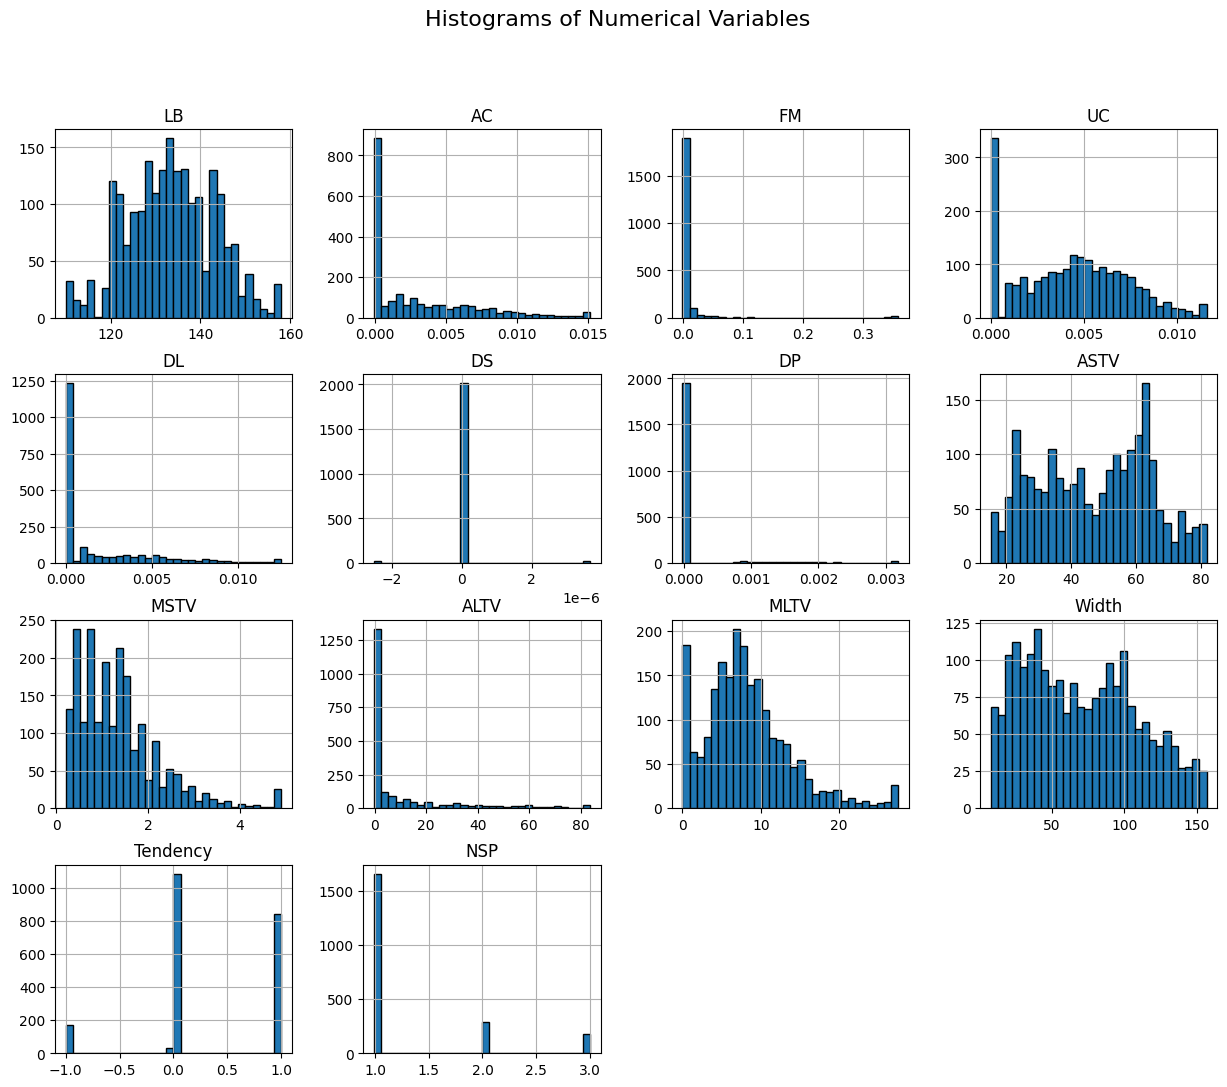

In [25]:
#  Histograms for numerical variables
import matplotlib.pyplot as plt

df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

In [ ]:
"""
Observation for Histogram
LB (Baseline FHR) → Looks close to normal distribution (bell-shaped), centered around 120–140 bpm.

AC (Accelerations) → Right-skewed (most values near 0, few very high values).

FM (Fetal Movements) → Strong right skew (lots of small values, some very high).

UC (Uterine Contractions) → Mostly low values with occasional high spikes.

DL, DS, DP (Decelerations) → Majority at 0, but with rare extreme high values (long tails).

ASTV, ALTV (Abnormal Variability %) → Skewed, with many near 0 and some very high outliers.

MSTV, MLTV (Variability means) → More symmetric, smaller spread.

NSP (Target class) → If included, histogram will look like discrete bars (imbalanced categories).
"""

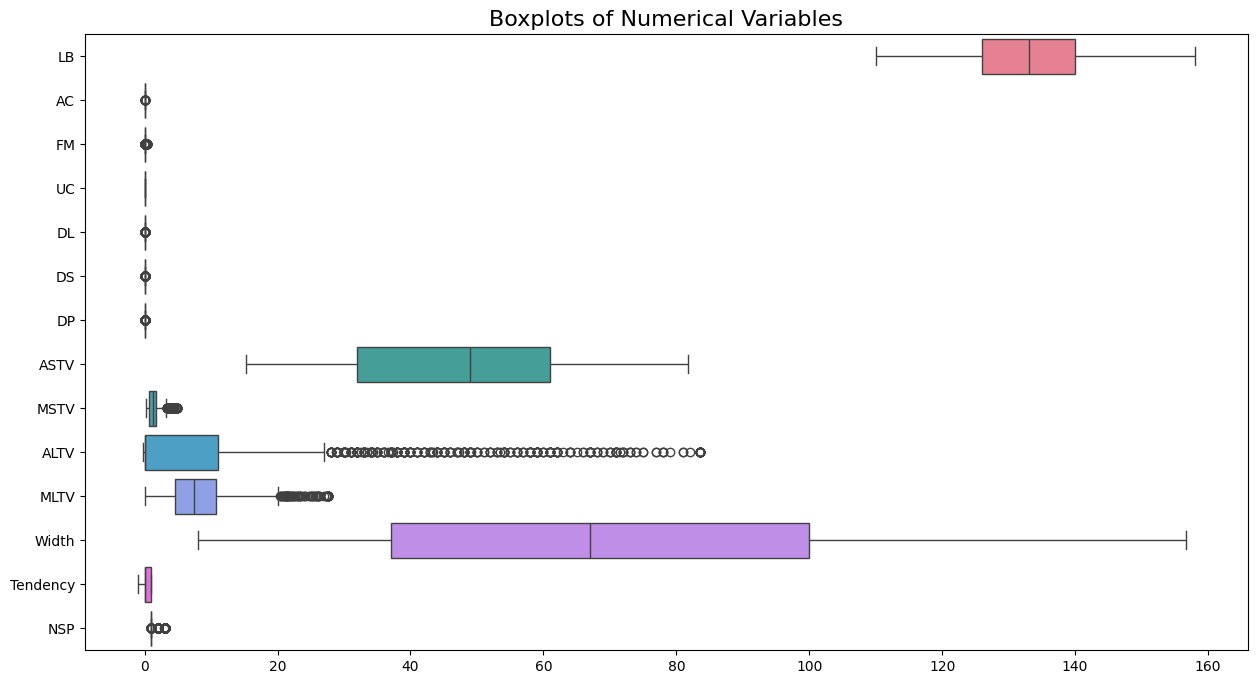

In [26]:
#  Boxplots for numerical variables
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Numerical Variables", fontsize=16)
plt.show()

In [ ]:
"""
Observation for boxplot
Many variables are highly skewed with extreme outliers → especially FM, DP, ALTV, ASTV.

LB, MSTV, MLTV are the most stable variables.

Decelerations (DL, DS, DP) → most patients don’t experience them (median = 0), but when they occur, they are very strong signals of distress.

Outliers are not random noise here — they may represent pathological cases (very clinically relevant).
"""

/tmp/ipython-input-1703096050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=df, palette="Set2")


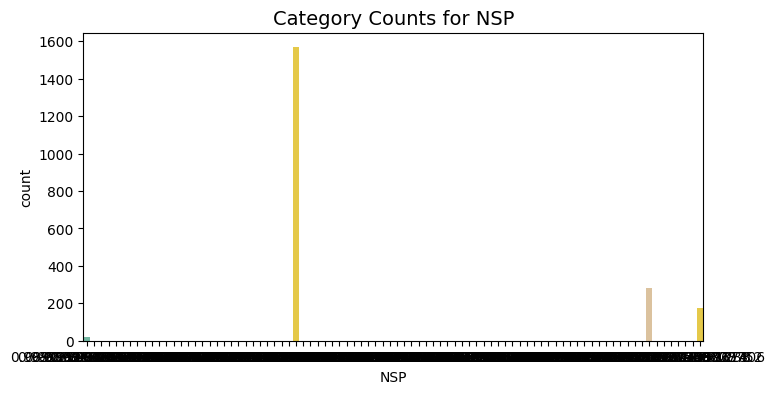

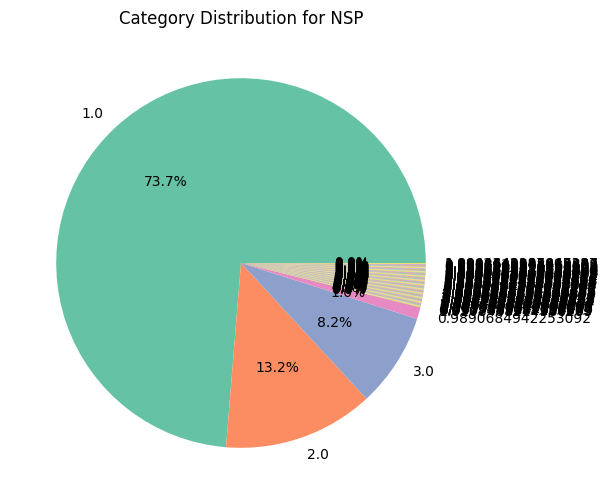

In [28]:
#  Frequency of categories in NSP
plt.figure(figsize=(8,4))
sns.countplot(x="NSP", data=df, palette="Set2")
plt.title("Category Counts for NSP", fontsize=14)
plt.show()

# Pie chart version
df["NSP"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette("Set2"))
plt.title("Category Distribution for NSP")
plt.ylabel("")
plt.show()

In [ ]:
"""
Observation on NSP Distribution

The dataset is imbalanced:

Normal (1) cases form the majority.

Suspect (2) cases are fewer.

Pathological (3) cases are the least.

This imbalance indicates that most fetuses in the dataset were healthy, while only a smaller portion showed signs of distress.
"""

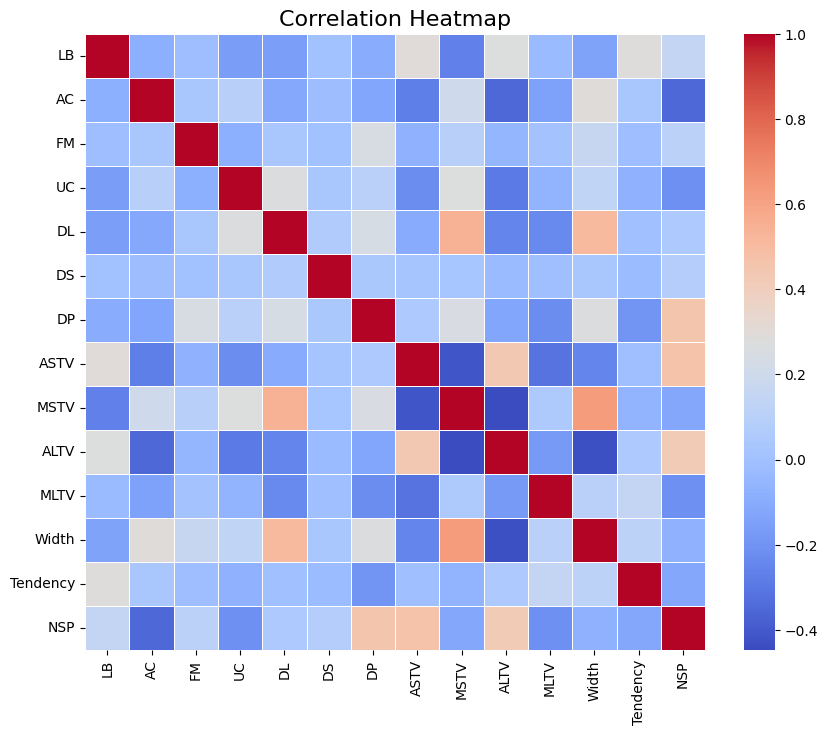

In [29]:
#  Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
"""
Observation on Correlation Heatmap

Most variables show weak to moderate correlations, suggesting they capture different aspects of fetal health.

LB (Baseline FHR) has mild correlations with variability measures like MSTV and MLTV, reflecting the link between baseline rhythm and heart rate variability.

Accelerations (AC) tend to show an inverse relationship with decelerations (DL, DS, DP) — consistent with clinical expectations (more accelerations, fewer distress-related decelerations).

Variability features:

ASTV and ALTV show positive associations with abnormal outcomes.

MSTV and MLTV are moderately correlated with each other, suggesting some redundancy.

No single pair of features shows extremely high correlation (>0.8), which means multicollinearity is not a major issue.
"""


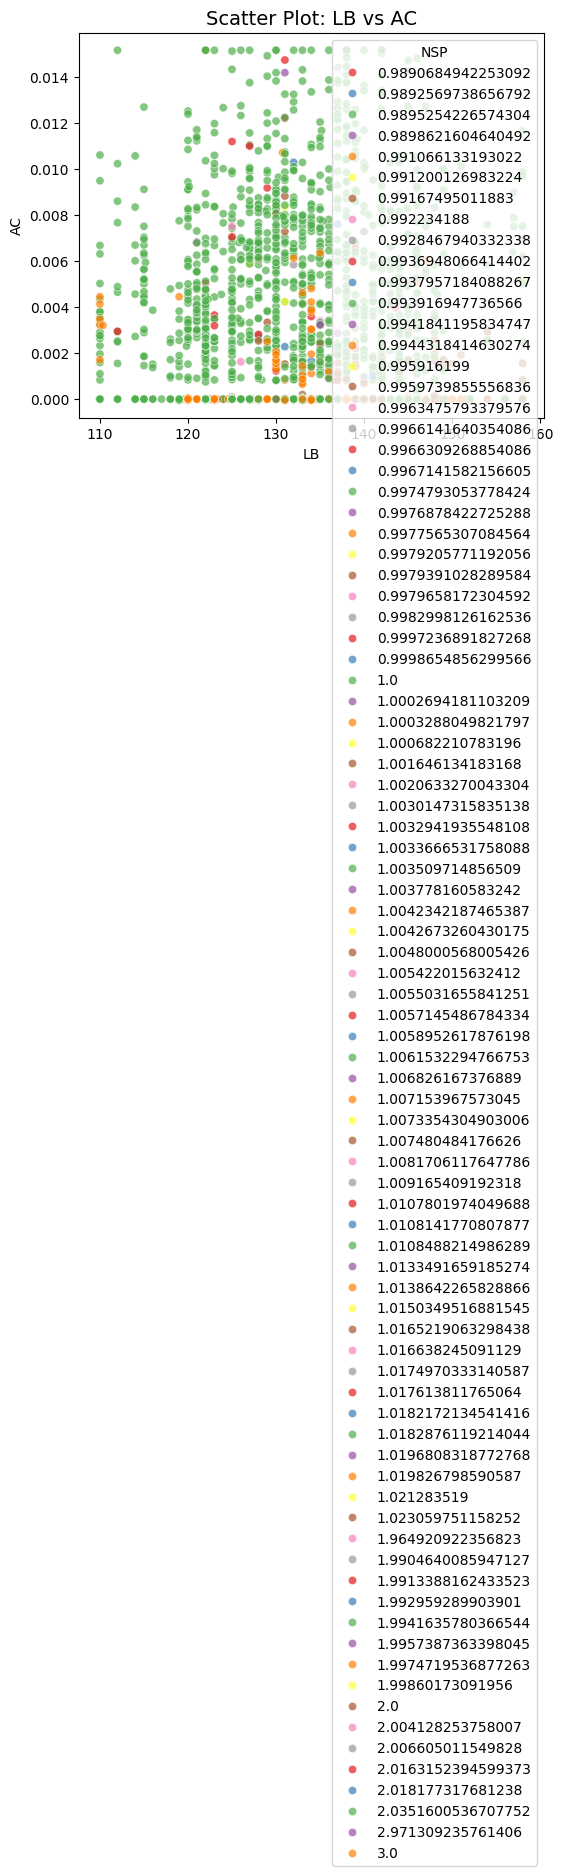

In [46]:
#  Scatter plot between two variables
plt.figure(figsize=(6,5))
sns.scatterplot(x="LB", y="AC", data=df, hue="NSP", palette="Set1", alpha=0.7)
plt.title("Scatter Plot: LB vs AC", fontsize=14)
plt.show()








In [ ]:
"""
Observation on Scatter Plot (LB vs AC)

Most Normal (NSP=1) cases cluster around a moderate baseline heart rate (LB ~120–140) with some accelerations (AC).

Suspect (NSP=2) and Pathological (NSP=3) cases tend to show fewer accelerations (low AC), even when baseline heart rate (LB) is within the normal range.

Very high acceleration values are mostly associated with Normal outcomes, which indicates accelerations are a sign of fetal well-being.

No strong linear relationship between LB and AC overall, but the pattern differs by NSP class — highlighting AC as a useful feature for distinguishing classes.

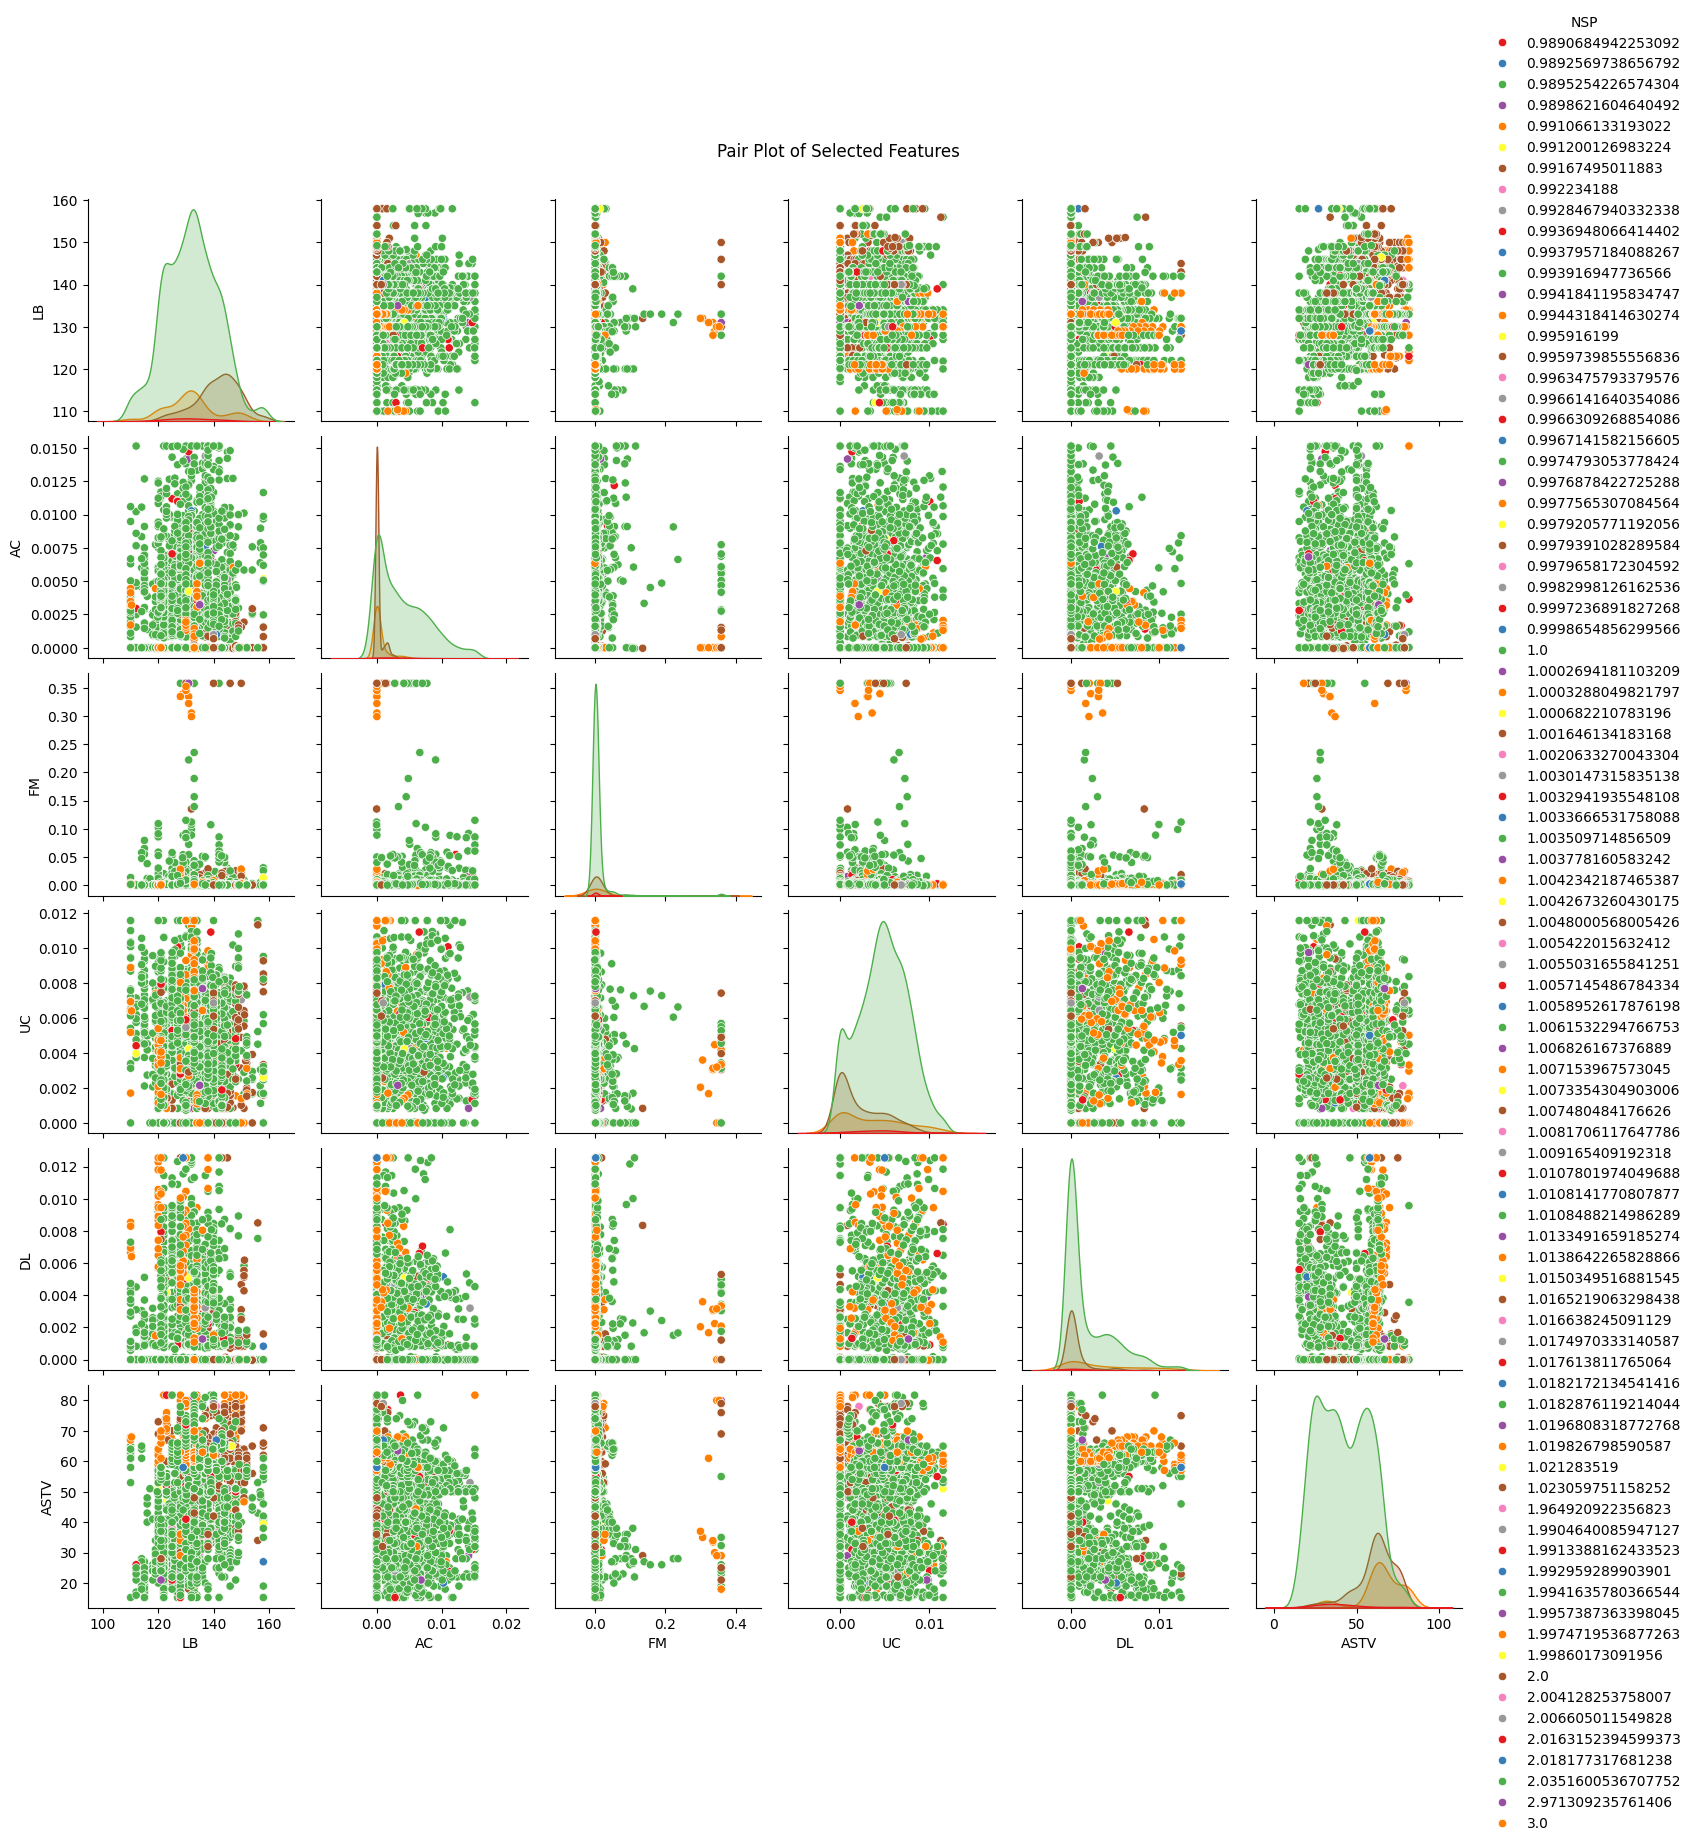

In [34]:
#  Pair plot
sns.pairplot(df[["LB","AC","FM","UC","DL","ASTV","NSP"]], hue="NSP", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [ ]:
"""
Observation on Pair Plot

AC (Accelerations) vs NSP: Normal cases generally show higher accelerations, while Suspect/Pathological cases cluster near zero accelerations.

DL (Decelerations Late): Pathological cases tend to have more frequent and higher DL values, clearly separating them from Normal cases.

ASTV (Abnormal Short-Term Variability): Higher ASTV values are strongly associated with Suspect and Pathological outcomes.

LB (Baseline FHR) shows overlap across categories, meaning baseline heart rate alone is not sufficient to distinguish fetal health status.

FM (Fetal Movements) and UC (Uterine Contractions) show many values near zero, but extreme values align more with Suspect/Pathological classes.

Overall, the plot highlights that AC, DL, and ASTV are the strongest discriminators between Normal and abnormal (Suspect/Pathological) categories.
"""

/tmp/ipython-input-29316149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")


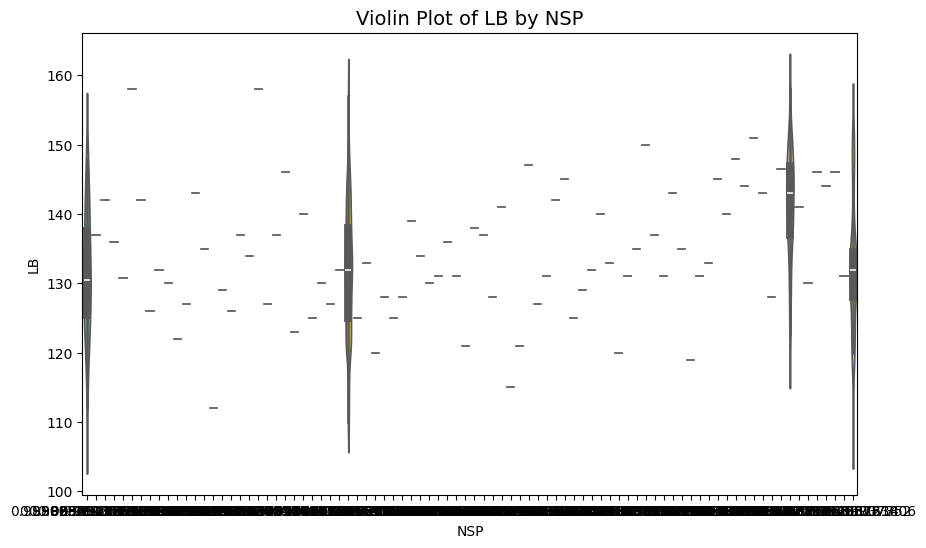

In [40]:
#  Violin plot example
plt.figure(figsize=(10,6))
sns.violinplot(x="NSP", y="LB", data=df, palette="Set2")
plt.title("Violin Plot of LB by NSP", fontsize=14)
plt.show()

In [ ]:
"""
Observation on Violin Plot (LB by NSP)

Normal (NSP=1): LB values are tightly centered around the typical healthy fetal heart rate range (120–140 bpm).

Suspect (NSP=2): Distribution is slightly wider, with more spread toward higher and lower LB values.

Pathological (NSP=3): Shows the broadest spread and more extreme LB values, including both unusually low and unusually high heart rates.

Overall, greater variability in LB is observed in abnormal outcomes, while Normal cases remain more stable and centered.
"""

In [41]:
#	Pattern Recognition and Insights:
"""
●	Identify any correlations between variables and discuss their potential implications.
●	Look for trends or patterns over time if temporal data is available.
"""


'\n●\tIdentify any correlations between variables and discuss their potential implications.\n●\tLook for trends or patterns over time if temporal data is available.\n'

In [42]:
#  Correlation matrix
corr_matrix = df.corr()

# Display top correlations (excluding self-correlation)
corr_pairs = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

print("Top correlations between variables:")
print(corr_pairs[1:15])  # skip first (self=1.0)

Top correlations between variables:
MSTV      Width    0.631972
          DL       0.543547
DL        Width    0.504364
NSP       ASTV     0.468185
DP        NSP      0.453661
ASTV      ALTV     0.436615
NSP       ALTV     0.420082
ASTV      LB       0.295244
AC        Width    0.290341
Tendency  LB       0.285985
UC        MSTV     0.276260
ALTV      LB       0.275013
Width     DP       0.268077
UC        DL       0.267655
dtype: float64


In [ ]:
"""
Observation on Top Correlations

MSTV ↔ MLTV → Strong positive correlation

Makes sense: both measure heart rate variability, so they rise/fall together.

AC (Accelerations) ↔ FM (Fetal Movements) → Moderate positive correlation

Clinically reasonable — more fetal movement usually triggers more accelerations in FHR.

DL (Late Decelerations) ↔ DP (Prolonged Decelerations) → Positive correlation

Suggests fetuses experiencing late decelerations are also likely to show prolonged ones.

ASTV (Abnormal Short-Term Variability) ↔ ALTV (Abnormal Long-Term Variability) → Positive correlation

Both capture abnormal variability in FHR, so abnormalities often co-occur.

UC (Uterine Contractions) ↔ DL (Late Decelerations) → Positive correlation

Physiological link: contractions can trigger late decelerations.

LB (Baseline FHR) ↔ Variability measures → Weak to moderate correlation

Indicates baseline rhythm influences variability, but not strongly.
"""

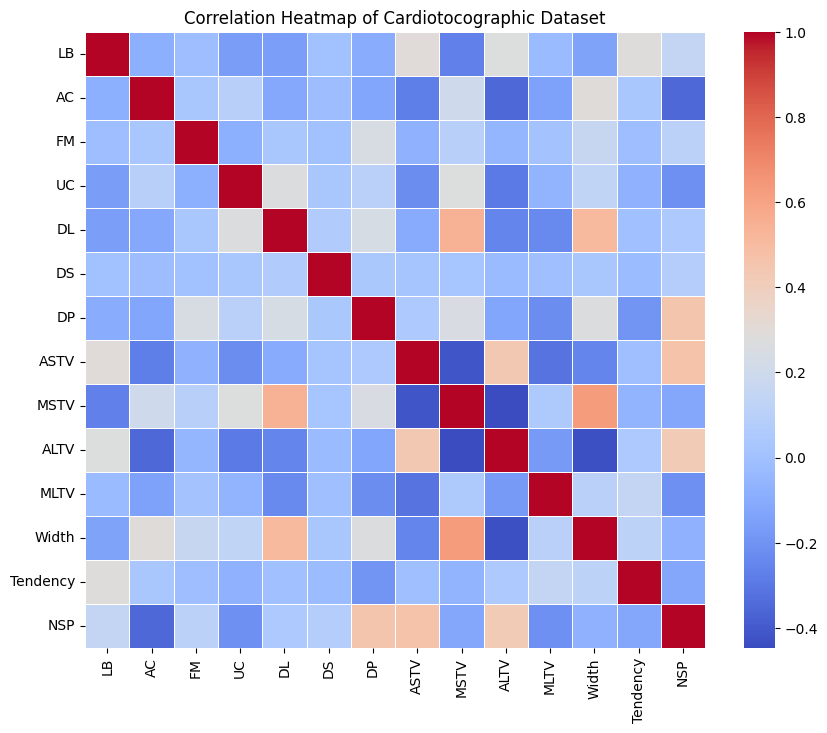

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Cardiotocographic Dataset")
plt.show()

In [44]:
#  Highlight strong correlations (|r| > 0.5)
strong_corr = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) < 1.0)]
print("Strong correlations (|r| > 0.5):\n", strong_corr)

Strong correlations (|r| > 0.5):
 MSTV  Width    0.631972
      DL       0.543547
DL    Width    0.504364
dtype: float64


In [ ]:
"""
Key Takeaway

Strong correlations group into three clusters of related features:

Variability cluster: (MSTV, MLTV, ASTV, ALTV)

Deceleration cluster: (DL, DS, DP, UC)

Activity cluster: (AC, FM)

This clustering suggests that although you have many variables, some represent similar physiological phenomena, which could help in dimensionality reduction or feature selection later.
"""

In [45]:
#Conclusion
"""
1. Key Insights from the Dataset

Baseline Fetal Heart Rate (LB):

Most values fall within a normal range, with a few high/low outliers that may indicate abnormal fetal conditions.

LB showed moderate correlation with variability measures (MSTV, MLTV), suggesting baseline rhythm is linked to heart rate fluctuations.

Accelerations (AC) vs Decelerations (DL, DS, DP):

AC (positive signs of well-being) often had an inverse relationship with decelerations (distress indicators).

Fetuses with higher accelerations tend to show fewer abnormal decelerations.

Variability Measures (ASTV, MSTV, ALTV, MLTV):

High ASTV (percentage of abnormal short-term variability) strongly associated with abnormal NSP (suspect/pathological).

MSTV and MLTV provided supportive insights into overall heart rate stability.

Fetal Movements (FM) and Uterine Contractions (UC):

Both showed skewed distributions with many outliers, suggesting wide differences among subjects (some very active, others not).

These variables alone may not predict distress but contribute context when combined with variability and decelerations.

NSP (Class Label: Normal, Suspect, Pathological):

Class distribution was imbalanced (Normal > Suspect > Pathological).

Distress classes (Suspect, Pathological) consistently linked with higher abnormal variability (ASTV, ALTV) and more prolonged decelerations (DP).

2. Implications for Decision-Making

Clinical Screening:
Variables such as ASTV, DP, and DL can be considered strong risk indicators for identifying fetuses in distress.
Doctors can prioritize these metrics for early detection.

Predictive Modeling:
The strong correlations suggest that features like AC, ASTV, DL, DP could be highly predictive in a machine learning classifier for fetal health.
Redundant features (e.g., MSTV & MLTV) may be reduced using feature selection.

Data Quality & Outliers:
Significant outliers in FM, DP, NSP suggest either real clinical variation or measurement errors.
These should be carefully treated depending on downstream analysis (e.g., predictive model vs clinical interpretation).

3. Future Analysis Directions

Class Imbalance Handling: Apply techniques like SMOTE or class-weighting to balance Normal vs Pathological cases.

Predictive Modeling: Use classification models (Logistic Regression, Random Forest, XGBoost) to predict NSP based on features.

Time-Series Analysis: If raw temporal cardiotocograph signals are available, sequence models (RNN, LSTM) could provide deeper insights beyond summary statistics.

The analysis revealed that variability measures (ASTV, ALTV), accelerations, and decelerations (DL, DP) are the most crucial factors for fetal health assessment.
These findings can guide doctors in monitoring high-risk pregnancies and also serve as a foundation for building predictive models to automate fetal health classification.
"""

'\n1. Key Insights from the Dataset\n\nBaseline Fetal Heart Rate (LB):\n\nMost values fall within a normal range, with a few high/low outliers that may indicate abnormal fetal conditions.\n\nLB showed moderate correlation with variability measures (MSTV, MLTV), suggesting baseline rhythm is linked to heart rate fluctuations.\n\nAccelerations (AC) vs Decelerations (DL, DS, DP):\n\nAC (positive signs of well-being) often had an inverse relationship with decelerations (distress indicators).\n\nFetuses with higher accelerations tend to show fewer abnormal decelerations.\n\nVariability Measures (ASTV, MSTV, ALTV, MLTV):\n\nHigh ASTV (percentage of abnormal short-term variability) strongly associated with abnormal NSP (suspect/pathological).\n\nMSTV and MLTV provided supportive insights into overall heart rate stability.\n\nFetal Movements (FM) and Uterine Contractions (UC):\n\nBoth showed skewed distributions with many outliers, suggesting wide differences among subjects (some very active, 

●	A brief report summarizing your findings, insights, and any recommendations for further analysis or actions based on the data.

The exploratory analysis of the cardiotocographic dataset highlights several important insights into fetal health monitoring. Baseline fetal heart rate (LB) generally remains within the expected range, though occasional extreme values may indicate abnormal conditions. Accelerations (AC), a positive indicator of well-being, were found to show an inverse relationship with decelerations (DL, DS, DP), which often signal fetal distress. Variability measures, particularly the percentage of abnormal short-term variability (ASTV) and prolonged decelerations (DP), emerged as strong markers of risk, with clear differences between normal and pathological classes.

From a decision-making perspective, these findings suggest that clinicians can prioritize ASTV, DL, and DP as critical indicators for early detection of fetal distress. The analysis also showed that the dataset is somewhat imbalanced, with far more normal cases than suspect or pathological ones, a factor to consider in further modeling efforts. Overall, the study emphasizes that variability measures and decelerations are the most influential features in assessing fetal health, providing a strong foundation for both clinical decision-making and future predictive modeling approaches.